In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random

In [17]:
def read_data(file_name):
    df = pd.read_csv(file_name)
    df = df[(df['species']=='virginica')|(df['species']=='versicolor')]
    features = df[['petal_length', 'petal_width']].to_numpy()
    classes = df[['species']].to_numpy()
    df = df[['petal_length', 'petal_width', 'species']].to_numpy()
    return df, features, classes

In [18]:
data, features, classes = read_data('irisdata.csv')

In [19]:
class singleNN:
    def __init__(self, weights, b, length=3):
        self.w = np.zeros(length)
        self.w[0] = b
        self.w[1:length] = weights

    def compute_output(self, values):
        output = np.matmul(values, np.transpose(self.w[1:3])) + self.w[0]
        return 1/(1+np.exp(-output))
    
    def individual_compute_output(self, x1, x2):
        output = self.w[0] + x1*self.w[1] + x2*self.w[2]
        return 1/(1+np.exp(-output))
    
    def second(self, first):
        two = -(self.w[1]/self.w[2]) * first - (self.w[0]/self.w[2])
        return two
    
    def get_weights(self):
        return self.w
    
    def update_weights(self, weights):
        self.w = weights

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(z):
    return z*(1-z)

def decision_boundary_plot(features, classes, weights, b):
    neuralNetwork = singleNN(weights, b)
    petal_length = np.linspace(3,7,40)
    petal_width = neuralNetwork.second(petal_length)
    
    plt.plot(petal_length, petal_width, c="black")
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Linear Decision Boundary using Sigmoid Function')
    plt.show()

def mse_given_data(data, pattern, weights, b, learning_rate):
    sNN = singleNN(weights, b)
    w = weights
    w1_update = 0
    w2_update = 0
    b_update = 0
    total_squared_residual = 0
    for i in range(len(data)):
        output = b + (data[i][0] * weights[0]) + (data[i][1] * weights[1])
        sig = sigmoid(output)
        dSig = derivative_sigmoid(sig)
        
        if pattern[i] == 'versicolor':
            actual = 0
        else:
            actual = 1
        
        residual = sig-actual
        squared_residual = (residual)**2
        b_update += (residual * dSig)
        w1_update += (residual * dSig) * data[i][0]
        w2_update += (residual * dSig) * data[i][1]
        total_squared_residual += squared_residual
        
    w[0] = weights[0] - learning_rate * (w1_update * 2 / (len(data)))
    w[1] = weights[1] - learning_rate * (w2_update * 2 / (len(data)))
    b = b - learning_rate * (b_update * 2 / (len(data)))
    
    mse = total_squared_residual / (len(data))
    
    return mse, w, b
            
def mse_given_labels(predicted, actual):
    return ((predicted-actual)**2)/(len(predicted))

def plot_gradient_descent(features, classes, weights, b):
    sNN1 = singleNN(weights, b)
    petal_length = np.linspace(3,7,40)
    petal_width = sNN1.second(petal_length)
    plt.plot(petal_length, petal_width, c="orange")
    
    mse, new_weights, new_b = mse_given_data(features, classes, weights, b, 0.005)
    print("initial mse: ", mse, "\n inital weights: ", weights, "\n initial bias: ", b)
    sNN2 = singleNN(new_weights, new_b)
    updated_petal_length = np.linspace(3,7,40)
    updated_petal_width = sNN2.second(updated_petal_length)
    plt.plot(updated_petal_length, updated_petal_width, c="green")
    
    new_mse, second_weights, second_b = mse_given_data(features, classes, new_weights, new_b, 1)
    print("new mse: ", new_mse, "\n new weights: ", new_weights, "\n new bias: ", new_b)
    
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Linear Decision Boundary using Sigmoid Function')
    plt.show()
    
def optimized_gradient_descent(features, classes, max_epoch, weights, b):
    epoch = 0
    mse_graph = []
    initial_sNN = singleNN(weights, b)
    petal_length = np.linspace(3,7,40)
    petal_width = initial_sNN.second(petal_length)
    plt.plot(petal_length, petal_width, c="orange")
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Initial Linear Decision Boundary using Sigmoid Function')
    plt.show()
    
    stopping_criterion = False
    while (stopping_criterion == False) and (epoch < max_epoch):
        epoch += 1
        mse, new_weights, new_b = mse_given_data(features, classes, weights, b, 0.05)
        mse_graph.append(mse)
        if (epoch > 1) and ((mse < 0.1) or ((mse_graph[epoch-2] - mse_graph[epoch-1])<0.00001)):
            stopping_criterion = True
            print("Algorithm succeeded before the maximum iterations", (mse_graph[epoch-2], mse_graph[epoch-1]))
            
        if epoch == (max_epoch/2):
            inter_sNN = singleNN(new_weights, new_b)
            petal_length = np.linspace(3,7,40)
            petal_width = inter_sNN.second(petal_length)
            plt.plot(petal_length, petal_width, c="green")
            color = ["blue" if label=='virginica' else 'red' for label in classes]
            plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
            plt.xlabel('petal length')
            plt.ylabel('petal width')
            plt.title('Intermediate Linear Decision Boundary using Sigmoid Function')
            plt.show()
    
    final_sNN = singleNN(new_weights, new_b)
    petal_length = np.linspace(3,7,40)
    petal_width = final_sNN.second(petal_length)
    plt.plot(petal_length, petal_width, c="blue")
    
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Final Linear Decision Boundary using Sigmoid Function')
    plt.show()
    
    epoch_domain = list(range(epoch))
    plt.plot(epoch_domain, mse_graph)
    plt.title("MSE at each Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.show()
    
    return mse, new_weights, new_b
        

[-0.82977995  2.20324493]
-4.998856251826551


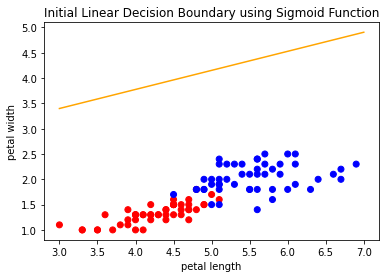

Algorithm succeeded before the maximum iterations (0.10092199774092434, 0.09998578101923065)


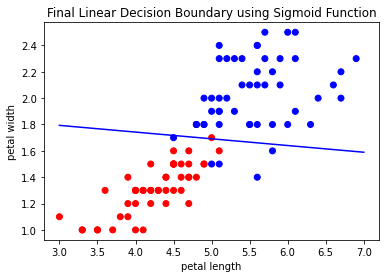

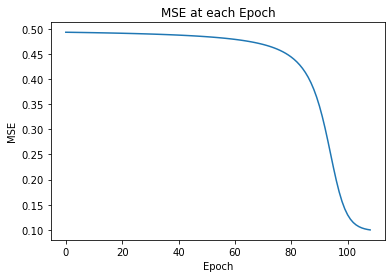

In [25]:
np.random.seed(1)
weights = np.random.uniform(-5, 5, 2)
b = np.random.uniform(-5, 5)
print(weights)
print(b)
mse, final_weights, final_b = optimized_gradient_descent(features, classes, 30000, weights, b)

In [21]:
final_weights

array([0.13090428, 2.56818373])

In [22]:
final_b

-4.998290704421683

In [23]:
mse

0.09998578101923065